<ipython-input-4-70d38447d89e>:27: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(caption_text, font)


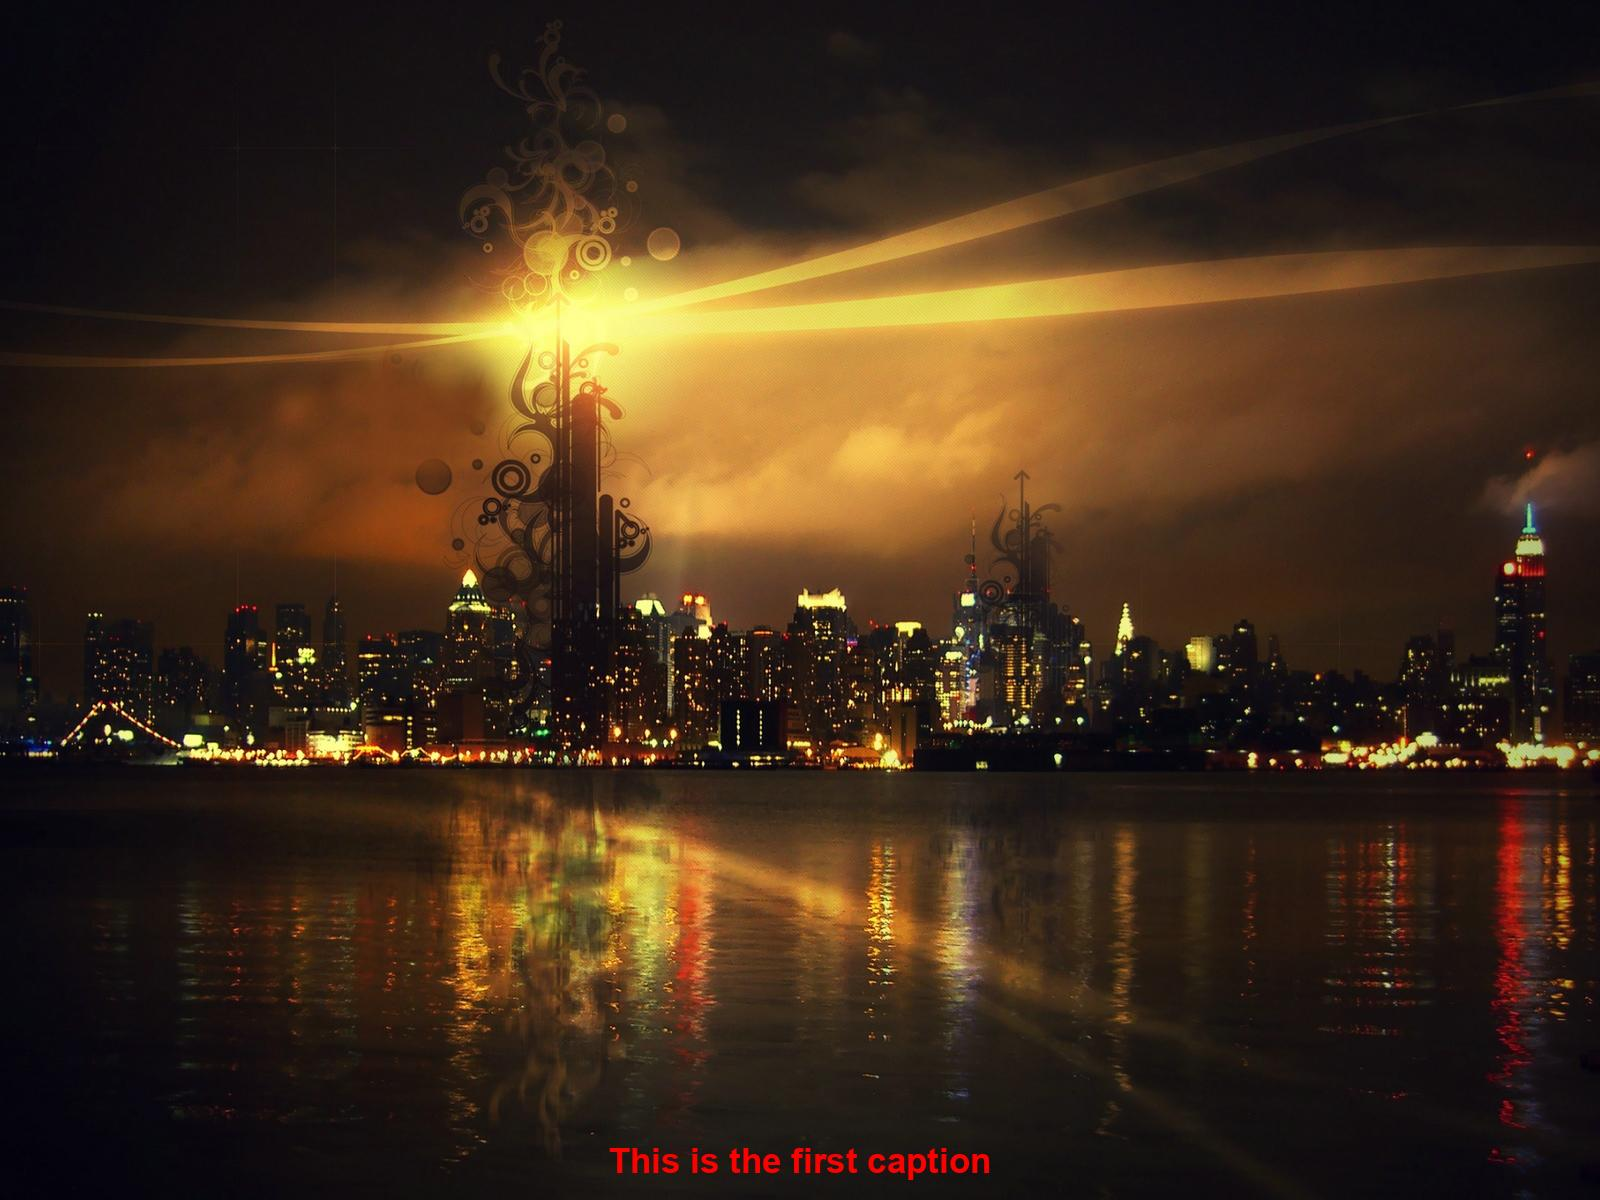

<ipython-input-4-70d38447d89e>:27: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(caption_text, font)


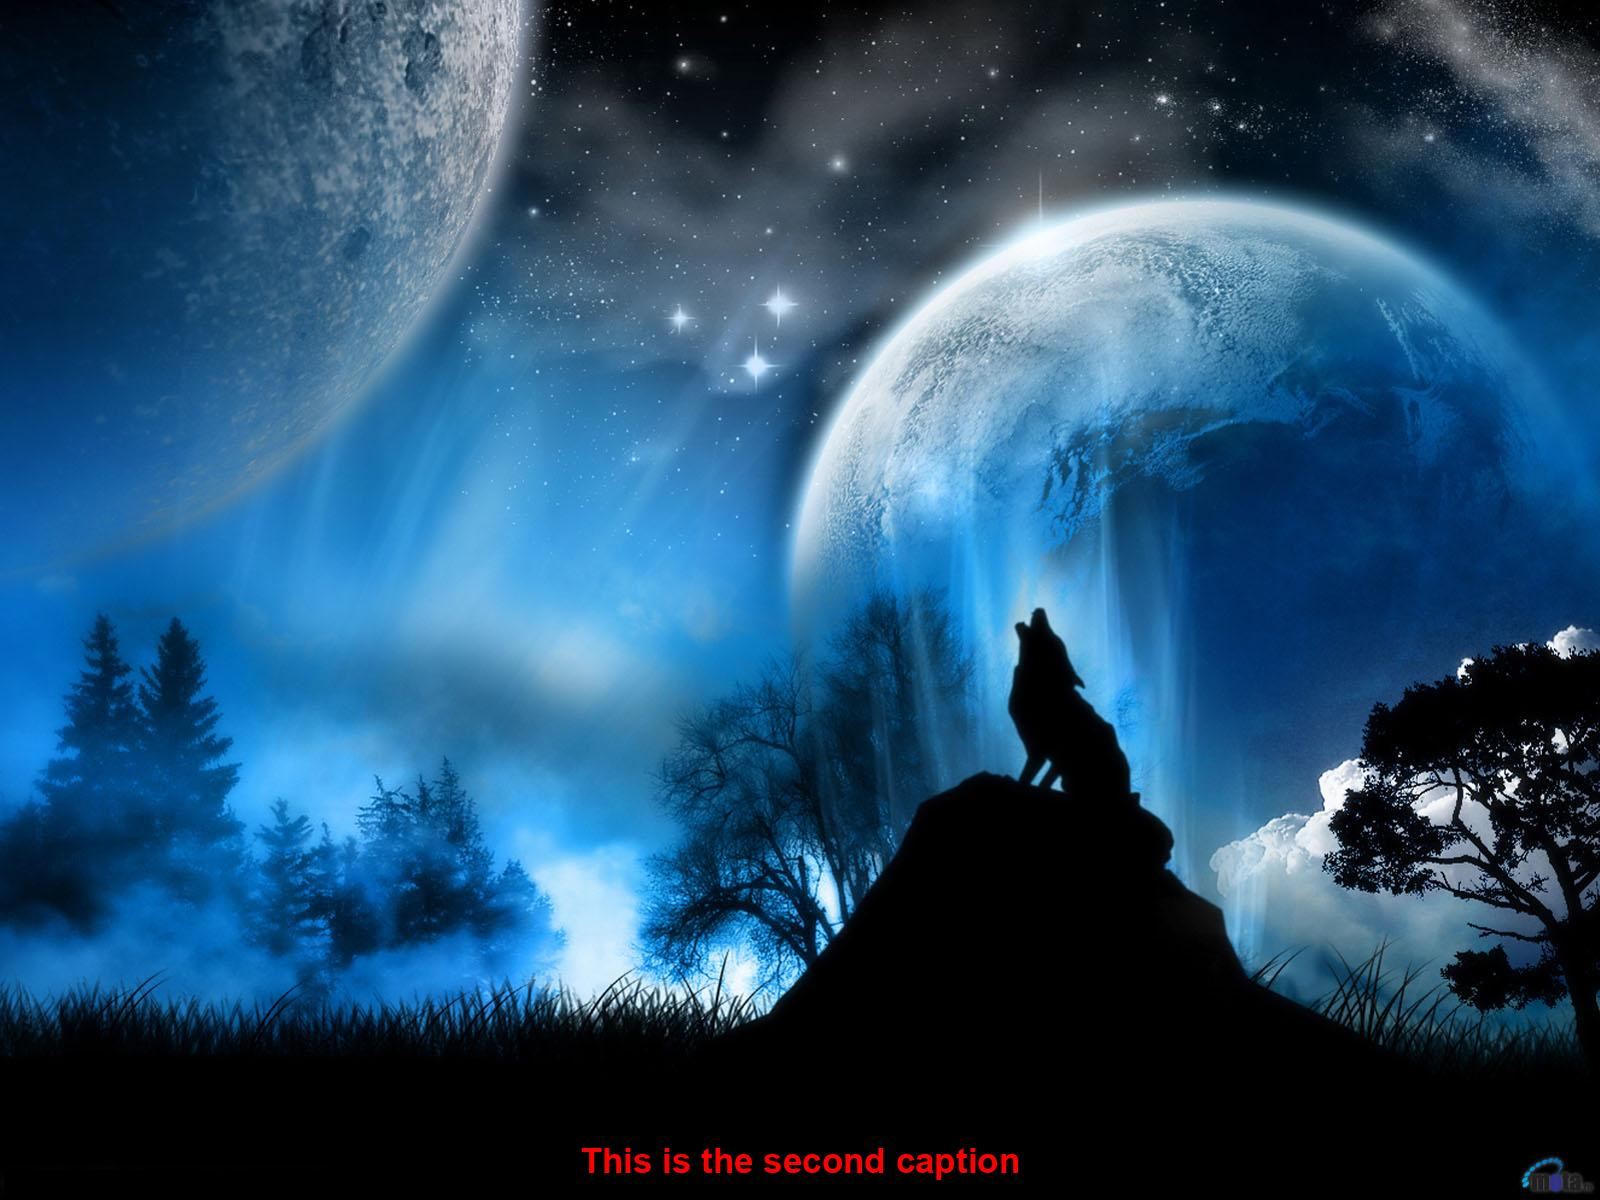

<ipython-input-4-70d38447d89e>:27: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(caption_text, font)


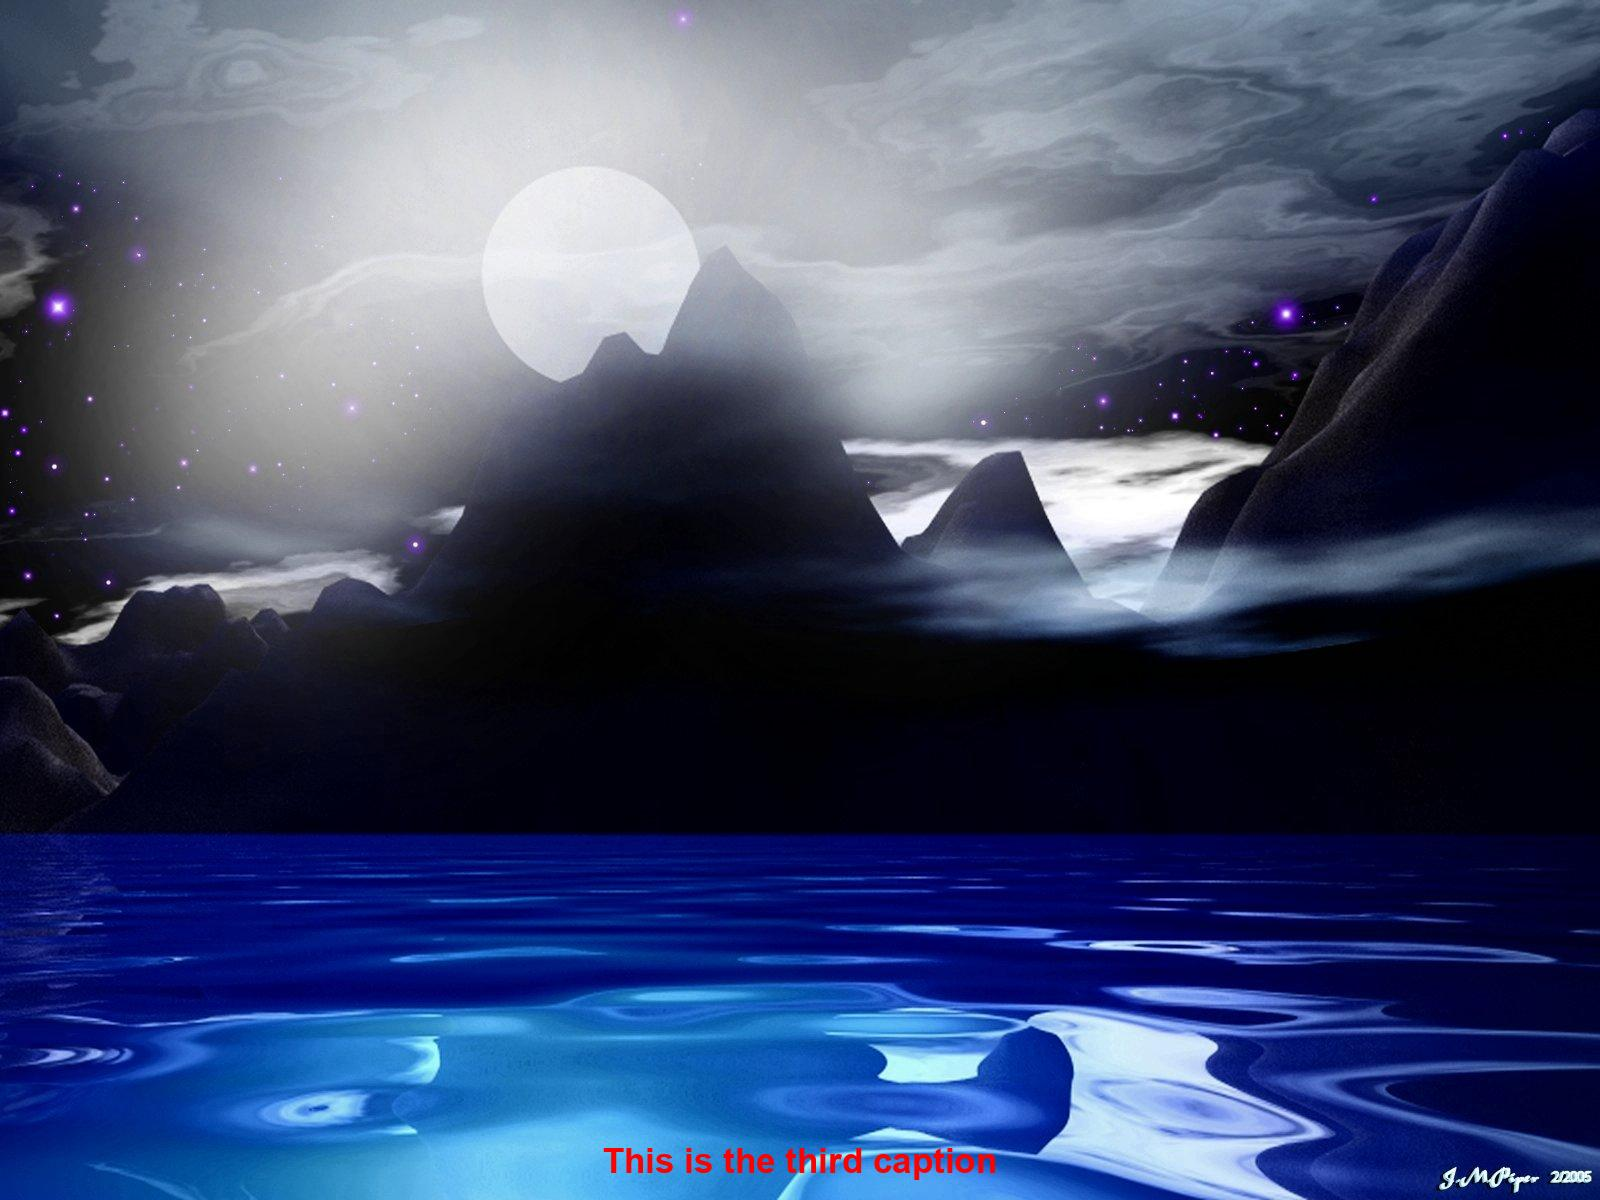

In [4]:
import os
import requests
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as IPImage, display

# Create a directory to store captioned images if it doesn't exist
if not os.path.exists("CaptionedImages"):
    os.makedirs("CaptionedImages")

# Image URLs
image_urls = [
    "https://i.ibb.co/xY4DJJ5/img1.jpg",
    "https://i.ibb.co/Gnd1Y1L/img2.jpg",
    "https://i.ibb.co/Z6JgS1L/img3.jpg",
]

captions = [
    "This is the first caption",
    "This is the second caption",
    "This is the third caption",
]
# Function to add caption to an image
def add_caption(image_path, caption_text, output_path):
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("/content/FontsFree-Net-arial-bold.ttf", 35)  # Use the provided font path
    text_width, text_height = draw.textsize(caption_text, font)
    image_width, image_height = img.size
    x = (image_width - text_width) / 2
    y = image_height - text_height - 20  # Adjust the vertical position as needed
    draw.text((x, y), caption_text, (255, 0, 0), font=font)
    img.save(output_path)
    # Download images, add captions, and display them
for i, url in enumerate(image_urls):
    # Download image
    response = requests.get(url)
    if response.status_code == 200:
        image_path = f"image{i+1}.jpg"
        with open(image_path, "wb") as f:
            f.write(response.content)

        # Add caption
        caption = captions[i]
        output_path = f"CaptionedImages/captioned_image{i+1}.jpg"
        add_caption(image_path, caption, output_path)

        # Display captioned image individually
        display(IPImage(output_path))
        # Clean up - remove downloaded images
for i in range(len(image_urls)):
    os.remove(f"image{i+1}.jpg")
